### Questão 2 - Método de Runge-Kutta 4, aplicado em equações de estado.

![Questão 2; enunciado - Terceira unidade](Questao2_enunciado.png)
![Questão 2; CKT - Terceira unidade](Ckt_questao_2.png)

### Bibliotecas importadas


In [53]:
import numpy as np
import matplotlib.pyplot as plt

### Equações de Estado do CKT

A seguinte célula do programa define as equações de estado que regem o circuito do problema.


In [54]:
def Eq_Estados(t, X, R, L, C, E_i):
    
    i_L = X[0] 
    v_C = X[1] 
    
    
    di_dt = (-R/L) * i_L - (1/L) * v_C + (1/L) * E_i
    dv_dt = (1/C) * i_L
    
    return np.array([di_dt, dv_dt])

### Algoritmo para Runge-Kutta de 4ª Ordem 

O Método de Runge-Kutta de quarta ordem é obtido considerando a série de Taylor para y, desenvolvida até o termo de ordem quatro. O algoritmo calcula quatro estimativas de inclinação ($k_1, k_2, k_3, k_4$) em diferentes pontos dentro do passo de integração $h$. O próximo valor da variável de estado, $y_{i+1}$, é determinado por uma média ponderada dessas inclinações, conforme a equação recursiva:

$$y_{i+1} = y_i + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$

Onde estas constantes são calculadas de acordo com as seguintes equações:

$$
\begin{cases}
k_1 = f(x_i, y_i) \\
k_2 = f(x_i + \frac{h}{2}, y_i + \frac{h}{2}k_1) \\
k_3 = f(x_i + \frac{h}{2}, y_i + \frac{h}{2}k_2) \\
k_4 = f(x_i + h, y_i + h k_3)
\end{cases}
$$




In [55]:
def runge_kutta_4(t_val, y0, R, L, C, E1, E2, t_chave):
    
    h = t_val[1] - t_val[0] 
    N = len(t_val)
    
    Y = np.zeros((N, 2))
    Y[0] = y0
    
    
    print(f"Iniciando simulação: R={R} Ohm, C={C}")
    
    # Condição para mudança da chave
    def get_E(t_atual):
        if t_atual < t_chave:
            return E1
        else:
            return E2
    
    for k in range(N - 1):
        t = t_val[k]
        y_atual = Y[k]
            
        # Cálculo dos coeficientes k_i
        
        
        k1 = Eq_Estados(t, y_atual, R, L, C, get_E(t))
        
        
        k2 = Eq_Estados(t + h/2, y_atual + (h/2)*k1, R, L, C, get_E(t + h/2))
        
        
        k3 = Eq_Estados(t + h/2, y_atual + (h/2)*k2, R, L, C, get_E(t + h/2))
        
        
        k4 = Eq_Estados(t + h, y_atual + h*k3, R, L, C, get_E(t + h))
        
        
        Y[k+1] = y_atual + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
        
    return Y

### Calculando cada caso do circuito

Agora este trecho do programa é responsável por calcular cada caso do ckt, onde muda-se a capacitancia C, obtendo diferentes EDO's, e no final, muda-se a resistividade do resistor.

Iniciando simulação: R=1 Ohm, C=1
Iniciando simulação: R=1 Ohm, C=0.08
Iniciando simulação: R=1 Ohm, C=1.2
Iniciando simulação: R=0 Ohm, C=0.08


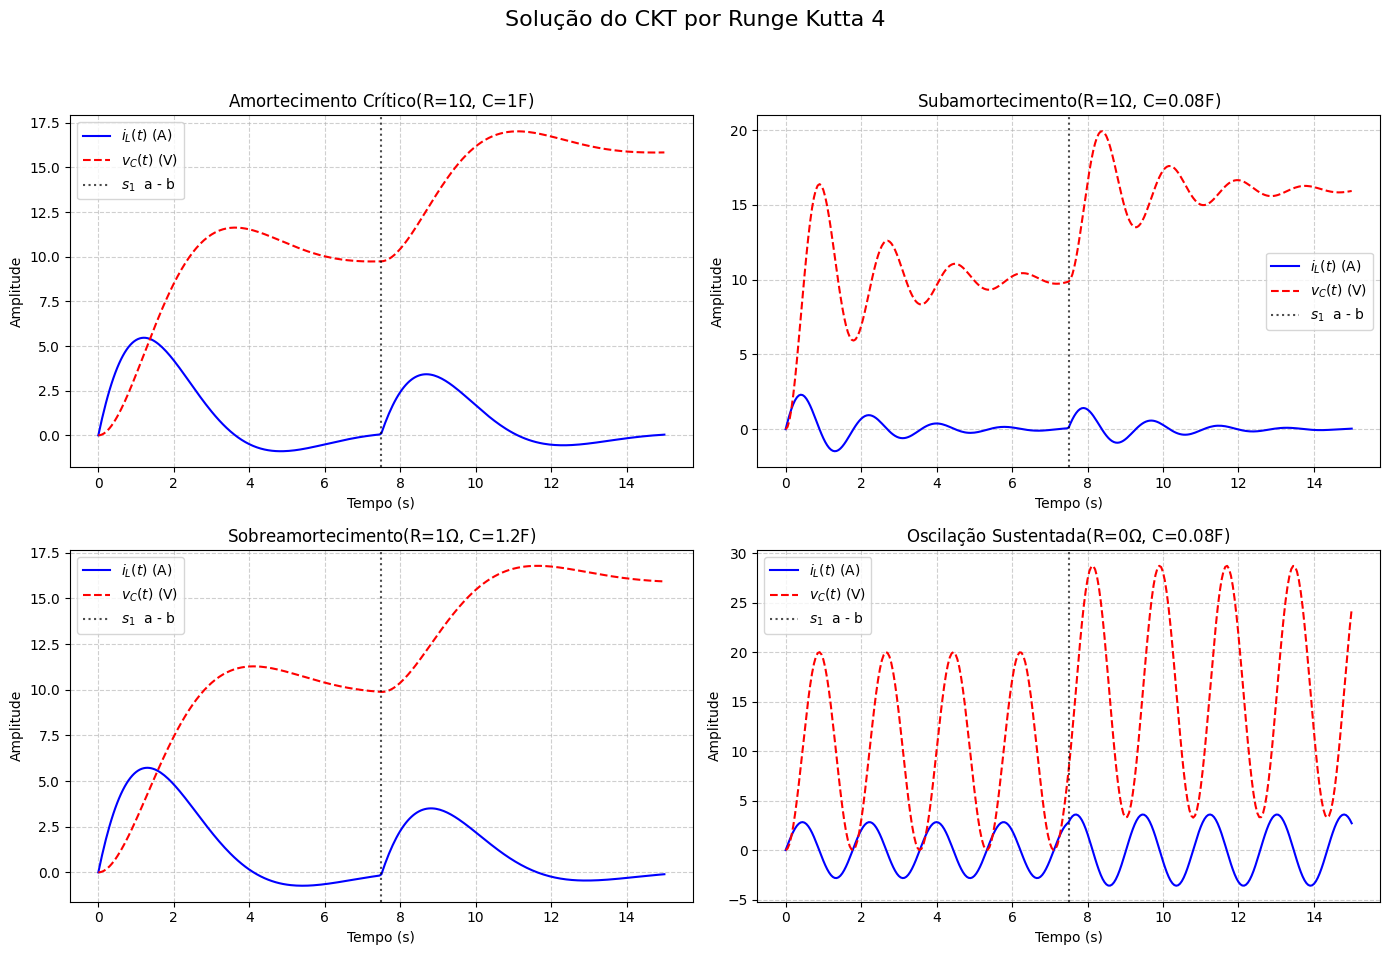

In [56]:

t_max = 15.0          
h = 0.05              
t_chave = t_max / 2  
L_val = 1.0           
E1_val = 10.0         
E2_val = 16.0         

# Vetor de tempo e condições iniciais
t_val = np.arange(0, t_max + h, h)
y0 = [0.0, 0.0] # inicialmente, antes de t = 0, o ckt está sem nenhuma exitação


casos = [
    ["Amortecimento Crítico", 1, 1],      # C=1F, R=1
    ["Subamortecimento",      0.08, 1],     # C=0.08F, R=1
    ["Sobreamortecimento",    1.2, 1],      # C=1.2F, R=1
    ["Oscilação Sustentada",  0.08, 0]      # C=0.08F, R=0 (Sem resistência)
]


fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Solução do CKT por Runge Kutta 4', fontsize=16)


for i, (nome, C_teste, R_teste) in enumerate(casos):
    
   
    resultado = runge_kutta_4(t_val, y0, R_teste, L_val, C_teste, E1_val, E2_val, t_chave)
    
    i_L_res = resultado[:, 0] 
    v_C_res = resultado[:, 1] 
    
    ax = axs[i // 2, i % 2]
    
    
    ax.plot(t_val, i_L_res, label='$i_L(t)$ (A)', color='blue', linewidth=1.5)
    ax.plot(t_val, v_C_res, label='$v_C(t)$ (V)', color='red', linestyle='--', linewidth=1.5)
    
    
    ax.axvline(x=t_chave, color='black', linestyle=':', label='$s_1$  a - b', alpha=0.7)
    ax.set_title(rf"{nome}(R={R_teste}$\Omega$, C={C_teste}F)")
    ax.set_xlabel('Tempo (s)')
    ax.set_ylabel('Amplitude')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()